In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
import keras

In [6]:
df = pd.read_csv("../datasets/Stocks/aapl.us.txt", 
                 na_values=['null'], 
                 index_col=['Date'],
                 parse_dates=True,
                 infer_datetime_format=True,
                 )
df

C:\Users\Hammam\AppData\Local\Temp\ipykernel_20576\32775085.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("../datasets/Stocks/aapl.us.txt",


,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
...,...,...,...,...,...,...
2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0
2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0
2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0


In [7]:
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (8364, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

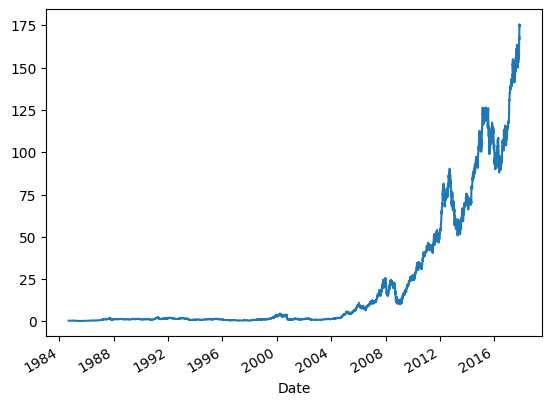

In [8]:
df['Close'].plot()

In [15]:
output_var = pd.DataFrame(df['Close'])
features = ['Open', 'High', 'Low', 'Volume',]

In [16]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

c:\Users\Hammam\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Hammam\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Hammam\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Hammam\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and a

,Open,High,Low,Volume
Date,,,,
1984-09-07,0.001091,0.001103,0.001082,0.011219
1984-09-10,0.001091,0.001081,0.001052,0.008708
1984-09-11,0.001099,0.001146,0.001118,0.020533
1984-09-12,0.001121,0.001117,0.001067,0.017937
1984-09-13,0.001179,0.001168,0.001199,0.027936


In [18]:
timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index) : (len(train_index) + len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index) : (len(train_index) + len(test_index))].values.ravel()

In [19]:
trainX = np.array(X_train)
testX = np.array(X_test)

X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [22]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(keras.layers.Dropout(0.1))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
history = lstm.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=8,
    verbose=1,
    shuffle=False,
)

Epoch 1/100
951/951 [==============================] - 11s 5ms/step - loss: 40.2833
Epoch 2/100
951/951 [==============================] - 6s 6ms/step - loss: 99.7212
Epoch 3/100
951/951 [==============================] - 7s 7ms/step - loss: 30.4716
Epoch 4/100
951/951 [==============================] - 6s 6ms/step - loss: 10.5049
Epoch 5/100
951/951 [==============================] - 5s 6ms/step - loss: 7.9828
Epoch 6/100
951/951 [==============================] - 5s 5ms/step - loss: 6.8852
Epoch 7/100
951/951 [==============================] - 5s 5ms/step - loss: 6.1790
Epoch 8/100
951/951 [==============================] - 7s 7ms/step - loss: 6.6161
Epoch 9/100
951/951 [==============================] - 8s 8ms/step - loss: 6.8442
Epoch 10/100
951/951 [==============================] - 7s 8ms/step - loss: 6.3188
Epoch 11/100
951/951 [==============================] - 7s 8ms/step - loss: 6.2512
Epoch 12/100
951/951 [==============================] - 8s 8ms/step - loss: 5.9200
Epoch 13

In [24]:
y_pred = lstm.predict(X_test)

24/24 [==============================] - 1s 4ms/step


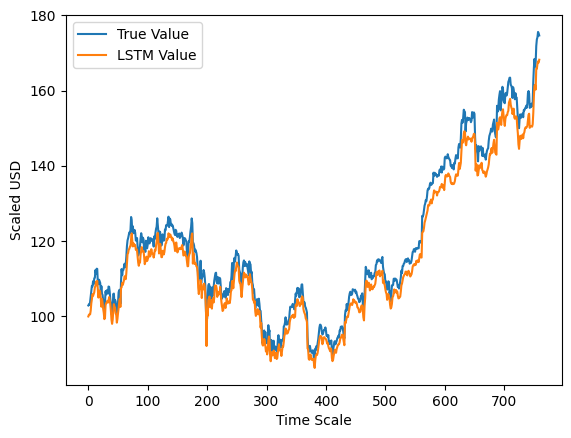

In [26]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()